## Data Collection Phase

To start looking at our data, let us read the csv first. We can use pandas dataframe, because it will give a nice tabular view of our data

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
no_show_df = pd.read_csv( 'data/noshowappointments-kagglev2-may-2016.csv')

no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#We see that Patient ID is printed as a float. We would rather have it as an integer, so let's convert
no_show_df['PatientId'] = no_show_df['PatientId'].astype('int64')

no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data description

The head() shows a snapshot of our data. 
* We see that the data has patientID and AppointmentID. Note that PatientID need not be unique, but ideally, AppointmenID should be
* Gender of the patient is represented by a letter : M (for males) and F (for females)
* We see that ScheduledDay and AppointmentDay are given as date string. However, note that ScheduledDay has a time string appended, while appointment day does not.
* We see that some important conditions like Hipertension, diabetes, etc are given in the data. From the kaggle source page for the data, we know that 1 means that the patient has that ailment and 0 means that the patient does not have that ailment.
* The scholarship column represents if the patient received any financial assistance from the "Bolsia Familia" social program. Again, 1 means the patient did receive aid and 0 means he/she did not.
* The column 'No-show' represents whether the patient showed up for the appointment. 'Yes' means that there was a no-show and the patient missed the scheduled appointment. 'No' means that the patient attended the appointment.

### Questions Phase

The data contains a lot of columns, but we should only use it to see if we can predict when a patient will have a no-show. We should not try and analyze ailment patterns (like percentage of people having diabetes, etc.) because no factors affecting ailments are captured in the data.  

So, focusing on only no-show, we can ask the following questions:
1. Do the patients suffering from an ailment more like to have a no-show? If yes, which ailment is more likely to cause a no-show?
2. Do patients which avail the Bolsia Familia schlarship more likely or less likely to have a no-show?
3. If patients receive an SMS for the appointment, will the probability of a no-show decrease?
4. Are male patients more likely or less likely to have a no-show, as compared to female patients?
5. Does the age play a factor in no-shows? Are older people more-likely to have a no-show?

We will first clean the data, before we can start analysis and try to answer any of the questions.

## Cleaning Phase

### Check for empty values

Let us check for empty values first. If there is some data missing in any rows, we will remove them so that our analysis is not affected by such values.

In [4]:
#Check if there is some row that contains empty data. If so, such row will need to be removed

no_show_df.isnull().values.any()

False

False means no empty value is present in data.

### Check for duplicates

Now, lets check for duplicate entries in AppointmentID. Rest all the columns can have duplicates, but if AppointmentID has duplicates, all such entries will need to be removed

In [5]:
#shows the number of duplicate entries in column AppointmentID
len(no_show_df[no_show_df.duplicated(['AppointmentID'])])

0

Since size of duplicates is 0, we do not need to remove any entry



### Normalize data
We see that the ScheduledDay and AppointmentDay have time information, but is inconsistent. AppointmentDay has time values as all zeros, while ScheduledDay has non-zero time values. Thus, let us normalize them, so that they can be compared easily.

In [6]:
normalized_df = no_show_df

normalized_df['ScheduledDay'] = pd.DatetimeIndex(no_show_df['ScheduledDay']).normalize()

normalized_df['AppointmentDay'] = pd.DatetimeIndex(no_show_df['AppointmentDay']).normalize()

In [7]:
normalized_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Negative value checks
Now let us check if there is any entry with 0 or negative value of PatientId and AppointmentID

In [8]:
len(normalized_df[normalized_df['PatientId'] < 1])

0

In [9]:
len(normalized_df[normalized_df['AppointmentID'] < 1])

0

Now let us check if there is any entry with negative value of Age (0 is a valid age for infants, so let us not check it)

In [10]:
len(normalized_df[normalized_df['Age'] < 0])

1

#### Cleaning part 1

There are no rows with negative value of PatientID or AppointmentID, but there is a row with negative age. So, we need to remove it.

In [11]:
clean_df1 = normalized_df[normalized_df['Age'] >= 0]

len(clean_df1[clean_df1['Age'] < 0])

0

#### Cleaning part 2

Now, there is a chance that the collected data has some wrong information. Ideally, all rows should have 'AppointmentDay' value greater or equal to 'ScheduledDay'. Let us remove all the rows where AppointmentDay is less than ScheduledDay.

In [12]:
print("No of rows in original csv = {}".format(len(clean_df1)))

clean_df2 = clean_df1[clean_df1['AppointmentDay'] >= clean_df1['ScheduledDay']]

print("No of rows after removing negative ScheduleDiff= {}".format(len(clean_df2)))

No of rows in original csv = 110526
No of rows after removing negative ScheduleDiff= 110521


Surely, there were some entries where AppointmentDay was less than ScheduledDay, which have gotten removed now, as seen from the print statement above.

The columns like Scholarship, Hipertension, etc. have binary values. But actually there may be some data errors in the entries. So, let us write a function to check if the data contains all 0s and 1s only and nothing else.

In [13]:
def check_non_binary (column):
    '''Returns the number of entries which have non-binary values
    i.e. values other than 0 or 1
    '''
    non_binary_count = 0
    for val in column:
        if(val not in [0,1]):
            non_binary_count+=1
    return non_binary_count

In [14]:
print("Non binary values in Scholarship column = {}".format(check_non_binary(clean_df2['Scholarship'])))

print("Non binary values in Hipertension column = {}".format(check_non_binary(clean_df2['Hipertension'])))

print("Non binary values in Diabetes column = {}".format(check_non_binary(clean_df2['Diabetes'])))

print("Non binary values in Alcoholism column = {}".format(check_non_binary(clean_df2['Alcoholism'])))

print("Non binary values in Handcap column = {}".format(check_non_binary(clean_df2['Handcap'])))

Non binary values in Scholarship column = 0
Non binary values in Hipertension column = 0
Non binary values in Diabetes column = 0
Non binary values in Alcoholism column = 0
Non binary values in Handcap column = 199


#### Cleaning part 3

We see that there are values in Handcap column which are not binary. Let us remove these values

In [15]:
clean_df3 = clean_df2[clean_df2['Handcap'].isin([0,1])]

print("No of rows after removing non binary Handcap = {}".format( len(clean_df3)))

No of rows after removing non binary Handcap = 110322


Let us check the same function with our new dataframe

In [16]:
print("Non binary values in Handcap column = {}".format(check_non_binary(clean_df3['Handcap'])))

Non binary values in Handcap column = 0


And now we don't have non-binary values for Handcap column. 

SMS received is the count of SMS received by the patient, so it can be 0, 1 or more than 1. So, let us check if there is a negative value for it.

In [17]:
len(clean_df3[clean_df3['SMS_received'] < 0])

0

Since the count for this is 0, we do not need to remove any rows

#### End of Cleaning Phase

This brings us to the end of cleaning phase. The final data which we have to work on is stored in the dataframe called **clean_df3**

## Analysis Phase

In [18]:
# We will use the describe function to get a sense of our data
clean_df3.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103220e+05,1.103220e+05,110322.00000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000
mean,1.475217e+14,5.675297e+06,37.07092,0.098285,0.196842,0.071609,0.030384,0.018491,0.321196
std,2.561305e+14,7.130031e+04,23.09791,0.297701,0.397614,0.257840,0.171642,0.134720,0.466938
min,3.921700e+04,5.030230e+06,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174515e+12,5.640275e+06,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680568e+06,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725513e+06,55.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Only the 'count' and 'mean' columns are relevant. Count shows the total number of appointments made and 'mean' shows the proportion of patients having that particular ailment or condition.

The describe shows following interesting information about our data:  
1. There are a total of 110,322 appointments which were made.
2. Around 9.8% people availed the Bolsa Familia scholarship.
3. The most common ailment in the collected data is Hipertension, with 19.68% people suffering from it
4. Around 32.12% patients received an SMS for their appointment

## Correlations

Let us try and find if the factors like scholarship, alcoholism, etc. have any correlation to the patients not showing up for appointments. For this, let us first convert No-Show column to binary values (o can be represented by 0 and Yes by 1). Then we will calculate the correlation coefficients for various factors with no-show data.

In [19]:
#define function that takes a Yes/No value, then returns a boolean
def convert_YesNo_to_boolean (string_val):
    ''' Converts Yes value to 1 and No value to 0
    '''
    if(string_val == 'Yes'):
        return 1
    else :
        return 0

In [20]:
#Lets instantiate a new copy dataframe, so that we can apply map function on the No-show column
clean_df4 = clean_df3.copy()

In [21]:
#apply the function to the 'No-show' column

clean_df4.loc[:,'No-show'] = clean_df3['No-show'].map(convert_YesNo_to_boolean)

clean_df4.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


We see that the No-Show column now has boolean values. Now, let us define the function to calculate correlation

In [22]:
#define the correlation function
def calculate_correlation (series1 , series2):
    '''Calculates correlation using vectorised operations.
    Uses ddof=0 to remove Besel's correction from standard deviation
    '''
    std_series1 = (series1 - series1.mean())/series1.std(ddof=0)
    std_series2 = (series2 - series2.mean())/series2.std(ddof=0)
    
    return (std_series1 * std_series2).mean()

In [23]:
#calculate correlations of different columns with 'No-show'. Save them in variables, as it may be useful later

corr_scholarship_noshow = calculate_correlation (clean_df4['Scholarship'], clean_df4['No-show'])
corr_hipertension_noshow = calculate_correlation (clean_df4['Hipertension'], clean_df4['No-show'])
corr_diabetes_noshow = calculate_correlation (clean_df4['Diabetes'], clean_df4['No-show'])
corr_alcoholism_noshow = calculate_correlation (clean_df4['Alcoholism'], clean_df4['No-show'])
corr_handcap_noshow = calculate_correlation (clean_df4['Handcap'], clean_df4['No-show'])
corr_sms_not_received_noshow = calculate_correlation (~clean_df4['SMS_received'], clean_df4['No-show'])

print("Correlation coefficient for Scholarship and No-show = {}".format(corr_scholarship_noshow))
print("Correlation coefficient for Hipertension and No-show = {}".format(corr_hipertension_noshow))
print("Correlation coefficient for Deiabetes and No-show = {}".format(corr_diabetes_noshow))
print("Correlation coefficient for Alcoholism and No-show = {}".format(corr_alcoholism_noshow))
print("Correlation coefficient for Handcap and No-show = {}".format(corr_handcap_noshow))
print("Correlation coefficient for SMS not Received and No-show = {}".format(corr_sms_not_received_noshow))

Correlation coefficient for Scholarship and No-show = 0.029423028622985174
Correlation coefficient for Hipertension and No-show = -0.03613470687879614
Correlation coefficient for Deiabetes and No-show = -0.015145711340716787
Correlation coefficient for Alcoholism and No-show = -0.0002286608099825005
Correlation coefficient for Handcap and No-show = -0.008021682020213073
Correlation coefficient for SMS not Received and No-show = -0.1267528955212833


**Result 1**  
We see that the values of correlation coefficients are too small to attribute any of these as a direct reason of a no-show. Surprisingl, even the Bolsa Familia scholarship and whether the patient received an SMs or not, do not seem to be factor for a no-show.

### Variations based on Gender

Let us first find the prortion of no-show in total data. To do this, I will calculate total number of rows and total number of no-show rows. I will store this in variables, because this may come handy later

In [24]:
total_appointments = len(clean_df4)

number_of_noshow = len(clean_df4[clean_df3['No-show'] == 'Yes'])

print("Total appointments = {} and number of no-shows = {}".format(total_appointments, number_of_noshow))

no_show_proportion = number_of_noshow / total_appointments

print("Proportion of all no-show = {}".format(no_show_proportion))

Total appointments = 110322 and number of no-shows = 22273
Proportion of all no-show = 0.2018908286651801


Now, let us calculate the proportion of male to females which made the appointments, and the respective proprtion of no-shows for them.

In [25]:
female_appointments = len(clean_df4[clean_df4['Gender'] == 'F'])

male_appointments = total_appointments - female_appointments

print("Number of female appointments = {} and number of male appointments = {}".format(female_appointments, male_appointments))

female_noshows = len(clean_df4[(clean_df4['No-show'] == 1) & (clean_df4['Gender'] == 'F')])

male_noshows = number_of_noshow - female_noshows

print("Number of female noshows = {} and number of male noshows = {}".format(female_noshows, male_noshows))

female_noshow_proportion = female_noshows / female_appointments

male_noshow_proportion = male_noshows / male_appointments

print("Proportion of female noshows = {} and proportion of male noshows = {}".format(female_noshow_proportion, male_noshow_proportion))

Number of female appointments = 71727 and number of male appointments = 38595
Number of female noshows = 14565 and number of male noshows = 7708
Proportion of female noshows = 0.20306160859927225 and proportion of male noshows = 0.1997149889882109


Let us represent this data in a bar chart, to easily see whats happening

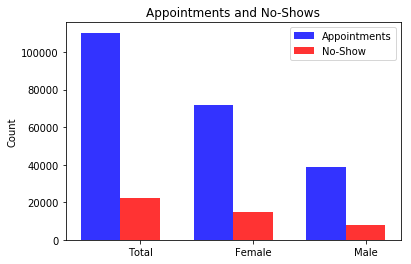

In [26]:
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 3
bardata_appointments = (total_appointments, female_appointments, male_appointments)
bardata_noshow = (number_of_noshow, female_noshows, male_noshows)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, bardata_appointments, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Appointments')
 
rects2 = plt.bar(index + bar_width, bardata_noshow, bar_width,
                 alpha=opacity,
                 color='r',
                 label='No-Show')
 
#arrange the data    
plt.ylabel('Count')
plt.title('Appointments and No-Shows')
plt.xticks(index + bar_width, ('Total', 'Female', 'Male'))
plt.legend()

#display the plot
plt.show()

**Result 2**  
Again, the proportions of no-shows in female and male patients is not very different, indicating that Gender is not a factor for No-Shows

### Variations by Age

Let us see if there is a variation in no-shows in people of different age groups. For this, let us define the following age groups:

Infant : 0-4 years   
Child : 5-17 years   
Adult : 18-59 years   
Senior : 60+

Let us add a new column called 'Age-group' for performing this analysis

In [27]:
#Define a function that converts age into age group

def convert_age_to_agegroup (ageVal):
    if ageVal < 5 :
        return 'Infant'
    elif ageVal >=5 and ageVal < 18 :
        return 'Child'
    elif ageVal >=18 and ageVal < 60 :
        return 'Adult'
    else :
        return 'Senior'

In [28]:
#Again, lets make a copy of our dataframe
agegroup_df = clean_df4.copy()

In [29]:
#apply the function to the 'Age' column

agegroup_df.loc[:,'Age-group'] = clean_df4['Age'].map(convert_age_to_agegroup)

agegroup_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age-group
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Senior
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Adult
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Senior
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Child
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Adult


We see a column of age-group being added. Now, let us use groupby to find the no-shows per group.

We will use the describe function to see a snapshot of whats happening. Also, we are interested in only the values for count and mean.

Count represents the total number of appointments  
Mean here actually represents the proportion of no-shows.

In [30]:
groupby_age_data = agegroup_df.groupby(['Age-group'])['No-show'].describe()[['count', 'mean']]

groupby_age_data

,count,mean
Age-group,,
Adult,61887.0,0.211062
Child,17095.0,0.241240
Infant,10240.0,0.182129
Senior,21100.0,0.152701


Remember that the proportions of total no-shows in our data was approximately 0.202

We see that children are the most likely to have a no-show, while seniors have the least probabily of a no-show. We cannot, however decipher the reason for this from our current data.  

This may just be because the children have to be accompanied by their parents or guardians who may be working, they may not be able to meet their commitment of the appointment. Or maybe some other reason which we just cannot know.

Text(0,0.5,'Proportion of no-show')

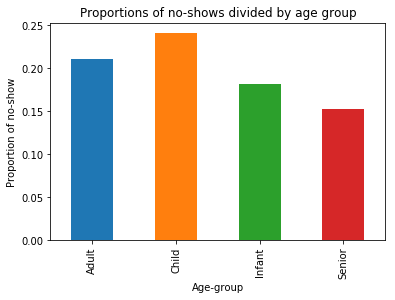

In [31]:
#Let us generate a bar graph for our age-group data. Rememeber, here mean = proportion of no-shows
plot1 = groupby_age_data['mean'].plot(kind='bar', title='Proportions of no-shows divided by age group')
plot1.set_ylabel('Proportion of no-show')

**Result 3**  
We see that age is certainly a factor for no-shows. 

## Additional Questions

We can ask further questions based on our findings and try to answer them:
1. Is gender a factor for no-shows across age groups?
2. Do patients living in different localities have different rates of no-show?

### Variations by Age-Group and gender

To answer the first additional question, we can use groupby on age-group and gender

In [32]:
agegroup_df.groupby(['Age-group', 'Gender'])['No-show'].describe()[['count', 'mean']]

count      mean
Age-group Gender                   
Adult     F       43595.0  0.212846
          M       18292.0  0.206812
Child     F        8934.0  0.240094
          M        8161.0  0.242495
Infant    F        4947.0  0.184758
          M        5293.0  0.179671
Senior    F       14251.0  0.156270
          M        6849.0  0.145277

Again, apart from minor variations, there is no major effect of gender on no-shows across the age-groups

#### Variations by Neighborhood

Next, let us see if there is a variation in no-show proportions for different neighborhoods.

In [33]:
#Use groupby to group the data based on neighborhoods
#The group by will group data for columns like 'PatientId' and dates, which does not make any sense to us.
#so let us only look at the 'No-show' column. 

neighborhood_df = clean_df4.groupby(['Neighbourhood'])['No-show'].describe()
neighborhood_df

,count,mean,std,min,25%,50%,75%,max
Neighbourhood,,,,,,,,
AEROPORTO,8.0,0.125000,0.353553,0.0,0.0,0.0,0.0,1.0
ANDORINHAS,2255.0,0.230599,0.421309,0.0,0.0,0.0,0.0,1.0
ANTÔNIO HONÓRIO,271.0,0.184502,0.388611,0.0,0.0,0.0,0.0,1.0
ARIOVALDO FAVALESSA,282.0,0.219858,0.414887,0.0,0.0,0.0,0.0,1.0
BARRO VERMELHO,423.0,0.215130,0.411399,0.0,0.0,0.0,0.0,1.0
BELA VISTA,1899.0,0.202212,0.401755,0.0,0.0,0.0,0.0,1.0
BENTO FERREIRA,855.0,0.225731,0.418308,0.0,0.0,0.0,0.0,1.0
BOA VISTA,312.0,0.185897,0.389649,0.0,0.0,0.0,0.0,1.0
BONFIM,2770.0,0.198195,0.398712,0.0,0.0,0.0,0.0,1.0


Text(0,0.5,'No of appointments')

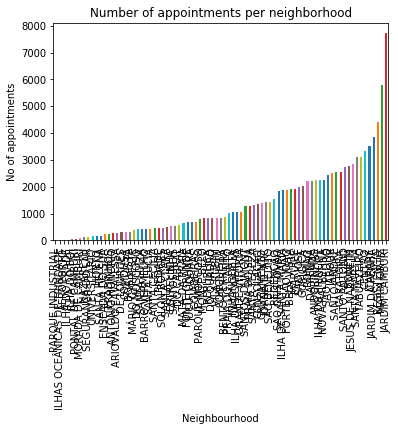

In [34]:
#Let us create a visualization for this data
plot2 = neighborhood_df['count'].sort_values().plot(kind='bar', title='Number of appointments per neighborhood')
plot2.set_ylabel('No of appointments')

We see that there are some neighborhoods which have very low number of appointments. We should not analyze the data for them because very few samples mean our predictions may be way off the mark. So, let us use a minimum threshold of 1000 appointments for a neighborhood.

In [35]:
#Use a filter to generate a new dataframe
filtered_df1 = clean_df4.groupby(['Neighbourhood']).filter(lambda x: len(x) > 1000)


In [36]:
#Select only count and mean. And sort on the mean
filtered_neighborhood_data = filtered_df1.groupby(['Neighbourhood'])['No-show'].describe()[['count','mean']].sort_values('mean')
filtered_neighborhood_data

,count,mean
Neighbourhood,,
SANTA MARTHA,3113.0,0.157726
JARDIM DA PENHA,3872.0,0.162965
CONSOLAÇÃO,1375.0,0.171636
SANTO ANTÔNIO,2742.0,0.175419
REDENÇÃO,1552.0,0.177191
NOVA PALESTINA,2261.0,0.177797
JABOUR,2509.0,0.179753
JOANA D´ARC,1423.0,0.181307
TABUAZEIRO,3126.0,0.182981


Text(0,0.5,'Number of appointments')

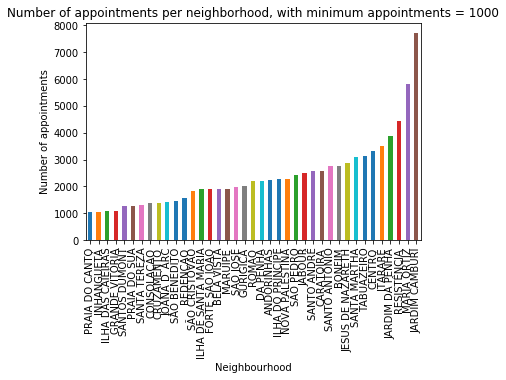

In [37]:
plot3 = filtered_neighborhood_data['count'].sort_values().plot(kind='bar', title='Number of appointments per neighborhood, with minimum appointments = 1000')
plot3.set_ylabel('Number of appointments')

Text(0,0.5,'Proportion of no-shows')

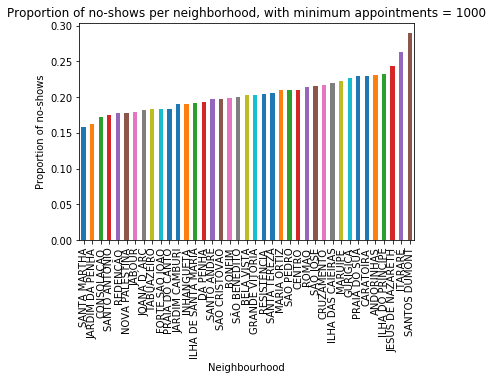

In [38]:
# Let us generate a bar-chart for the no-show proportions as well
plot4 = filtered_neighborhood_data['mean'].plot(kind='bar', title='Proportion of no-shows per neighborhood, with minimum appointments = 1000')
plot4.set_ylabel ('Proportion of no-shows')

We see Neighborhood certainly has a huge effect on the no-show rates. Neighborhoods like Santos Dumont and Itarare have way more no-show rates (28.96% and 26.26%) than our total average of 20.19%. Where as, neighborhoods like Santa Martha has a relatively less no-show rate at 15.77%. We can not predict why is it so, maybe Santa Martha has better transportation to the clinics, or maybe clinic at Santos Dumont is not well-equipped, we cannot say with just this data.

**Results 4**  
Different neighborhoods have quite varied no-show rates, with some having very high rates of no-show and others having relatively lower no-show rates.

## Results Summary

### Limitations
Although the data has been cleaned, with there being no nulll or invalid values used in the analysis, there still remain some inherent limitations in the dataset:
1. There is no column in the data which tells for what problem the patient initially booked the appointment. In my opinion, if the patient was sufferring from a minor condition like a common cold or a cough, the chances of a no-show are higher, as compared to serious conditions like heart trouble.
2. There is no data about the accessibility of the clinic from patient's house. If the patient has easier accessibility, like a direct bus, the chances of a no-show are lesser. Having this data would have improved the accuracy of our predictions.
3. We see that children have the highest number of no-show rate. This is possibly because they need to be accompanied by a parent or guardian, who may not be avaialble and therefore causes a no-show. However, I believe that in households where there are multiple care-givers, like a grandmother or an aunt, to take care of children, the chances of a no-show are lesser. Such data in the dataset would have helped us improve our capability to predict a no-show.


### Results

Within the bounds of the limitations listed above, we can summarize our findings as below:

1. The no-show rate for the entire data is 20.19% i.e. 20.19% of the times people do not show up for their appointments.
2. Factors like Diabetes, Hipertension, Alcoholism or having a handicap, do not affect the no-show rate
3. Having a Bolsa Familia scholarship or not does not have any affect on no-show rate
4. Having received an SMS for the appointment or not does not seem to affect the no-show rate very much
5. Women visit the clinics more often than men, but both men and women have similar no-show rates
6. No-show rates are affected by age. Older people of 60+ age have least no-show rate of 15.27%. Infacts of age less than 5 years have the highest no-show rates of 24.12
7. No-show rates are also affected by where the clinic is located. Some neighborhoods have far lesser no-show rate and some have way too high no-show rates.

### References

- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
- https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/
- https://stackoverflow.com/questions/44890713/selection-with-loc-in-python
- https://stackoverflow.com/questions/25008795/plot-dataframe-pandas-not-working